# Example

In [1]:
import os
import sys

BASE_PATH = os.path.abspath(os.pardir)
DATA_PATH = os.path.join(BASE_PATH, 'examples/data/cheetah_bacteria')
MODEL_PATH = os.path.join(DATA_PATH, 'unet_params')
TEST_PATH = os.path.join(DATA_PATH, 'tests')

sys.path.append(BASE_PATH)

## Train the U-Net.

In [2]:
from senso.train import train

In [ ]:
train(MODEL_PATH, DATA_PATH, 50, 1, 1e-4)

# Validate the trained U-Net

In [3]:
from senso.predict import predict, mask_from_pred

Show the test image.

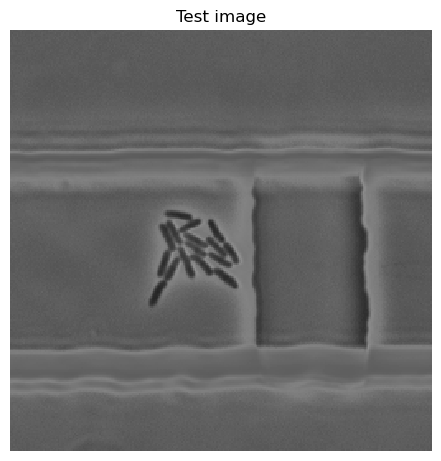

In [4]:
from skimage import io, img_as_ubyte
from matplotlib import pyplot as plt

im = io.imread(os.path.join(TEST_PATH, 'test_image.tif'))

io.imshow(im)
plt.axis('off')
plt.title('Test image')
plt.show()

Evaluate the test image using the trained U-Net.

In [5]:
pred = predict(MODEL_PATH, os.path.join(TEST_PATH, 'test_image.tif'))

mask = mask_from_pred(pred)


Show and check the background mask.

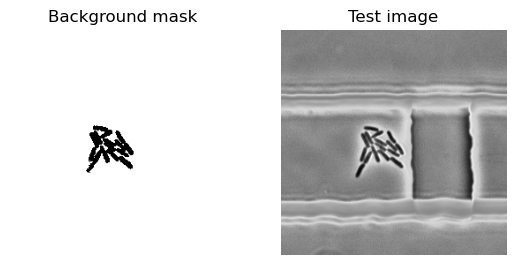

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].imshow(mask==0, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Background mask')

ax[1].imshow(im, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Test image')

plt.show()

Show the filtered background image.

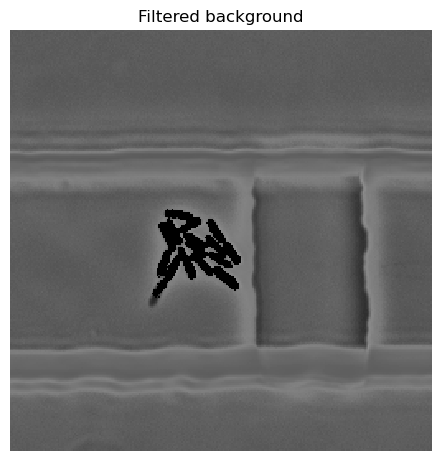

In [7]:
im_back = im * (mask==0)

io.imshow(im_back, cmap='gray')
plt.axis('off')
plt.title('Filtered background')
plt.show()

Show and check the cell contour mask.

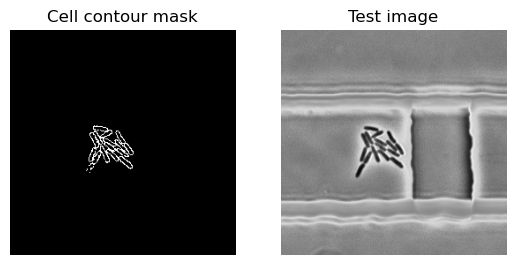

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].imshow(mask==1, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Cell contour mask')

ax[1].imshow(im, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Test image')

plt.show()

Show the filtered cell contour image.

/Users/perrino/miniforge3/envs/torch-gpu/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


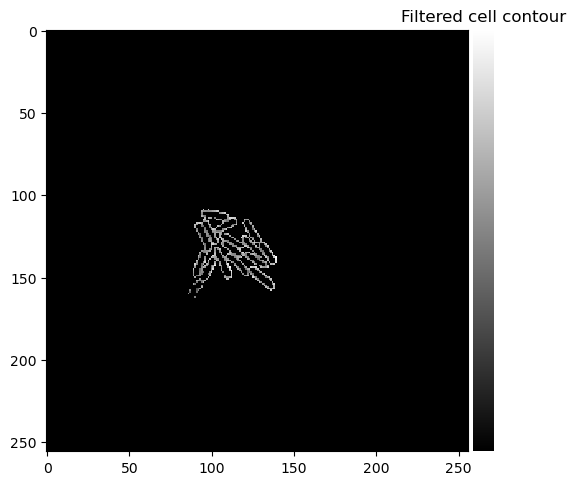

In [9]:
im_contour = im * (mask==1)

io.imshow(im_contour, cmap='gray')
plt.axis('off')
plt.title('Filtered cell contour')
plt.show()

Show and check the cell mask.

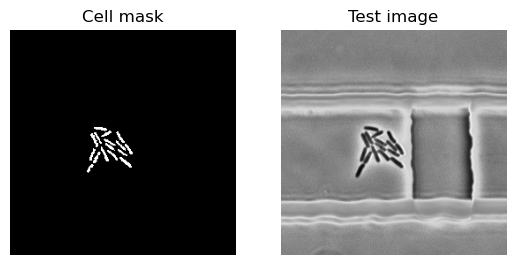

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].imshow(mask==2, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Cell mask')

ax[1].imshow(im, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Test image')

plt.show()

Show the filtered cell image.

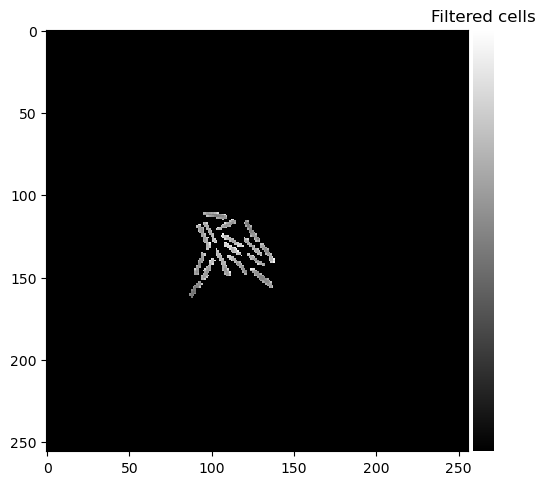

In [11]:
im_cell = im * (mask==2)

io.imshow(im_cell, cmap='gray')
plt.axis('off')

plt.title('Filtered cells')
plt.show()